In [13]:
import h5py
import numpy as np
from scipy.ndimage import zoom
from matplotlib import pyplot as plt

In [14]:
image_path = 'path/to/image'

In [15]:
def open_dataset(image_path):
    fl = h5py.File(image_path, 'r')
    print(fl.keys())
    pred = np.array(fl['vol0'])
    fl.close()
    return pred


In [16]:
def dataset_info(pred):
    print("Max element in Pred: ", pred.max())
    print("Shape of Pred: ", pred.shape)
    print("Unique elements in Pred: ", np.unique(pred))


In [17]:
 
#pred = (pred*255).astype(np.uint8)

In [18]:
pred = open_dataset(image_path)
dataset_info(pred)

KeysView(<HDF5 file "resulttest_P7.h5" (mode r)>)
Max element in Pred:  252
Shape of Pred:  (3, 100, 2500, 2500)
Unique elements in Pred:  [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 2

In [22]:
#Images with Pixel Size > 200
ans_gt = []
cnt_gt = 0
cnt_pred = 0
for i in range(100):
    curr_image = pred[:, i, :, :]
    if curr_image.max() > 200:
        ans_gt.append(i)
        cnt_gt+=1
ans_pred = []
# for i in range(200):
#     curr_image = pred_output[:, i, :, :]
#     if curr_image.max() > 200:
#         ans_pred.append(i)
#         cnt_pred++
print(ans_gt)
print("Number in GT: ", cnt_gt)
print(ans_pred)
print("Number in Pred: ", cnt_pred)


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
Number in GT:  99
[]
Number in Pred:  0


In [23]:
#Visualisation of GT, Predicted output and raw EM Images
def print_gt(slice):
    plt.figure(figsize=(10,10))
    final_img_2 = pred[0, :, slice, :, :]
    print("Max Value in this GT slice: ", final_img_2.max())
    plt.imshow(final_img_2.transpose(1,2,0))
    plt.show()
def print_pred(slice):
    plt.figure(figsize=(10,10))
    final_img_2 = pred_output[:, slice, :, :]
    print("Max Value in this PRED slice: ", final_img_2.max())
    plt.imshow(final_img_2.transpose(1,2,0))
    plt.show()
def print_em(slice):
    plt.figure(figsize=(10,10))
    final_img_2 = im_input[slice, :, :]
    print("Max Value in this EM slice: ", final_img_2.max())
    plt.imshow(final_img_2, cmap='gray')
    plt.show()
    

Original Prediction Shape:  (3, 100, 2500, 2500)
Original Predicted Image 


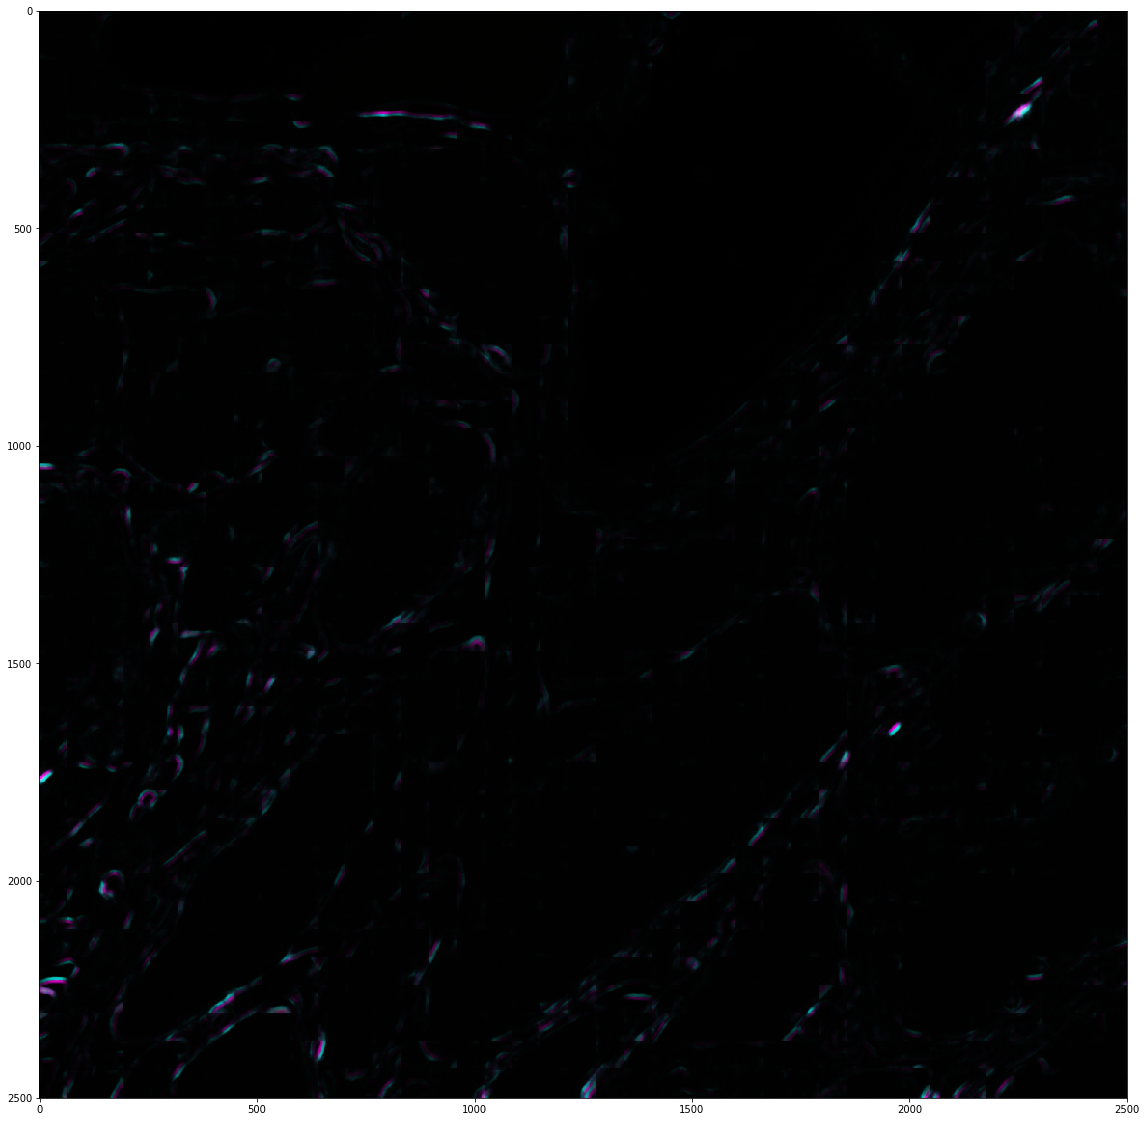

In [27]:
temp = pred.copy()
thres = 64
temp[temp < thres] = 0
temp[temp > thres] = 255

print("Original Prediction Shape: ", pred.shape)
print("Original Predicted Image ")
plt.figure(figsize=(20,20))
plt.imshow(pred[:, 10].transpose(1,2,0))
plt.show()



Thresholded Image Shape:  (3, 100, 2500, 2500)
Thresholded Image


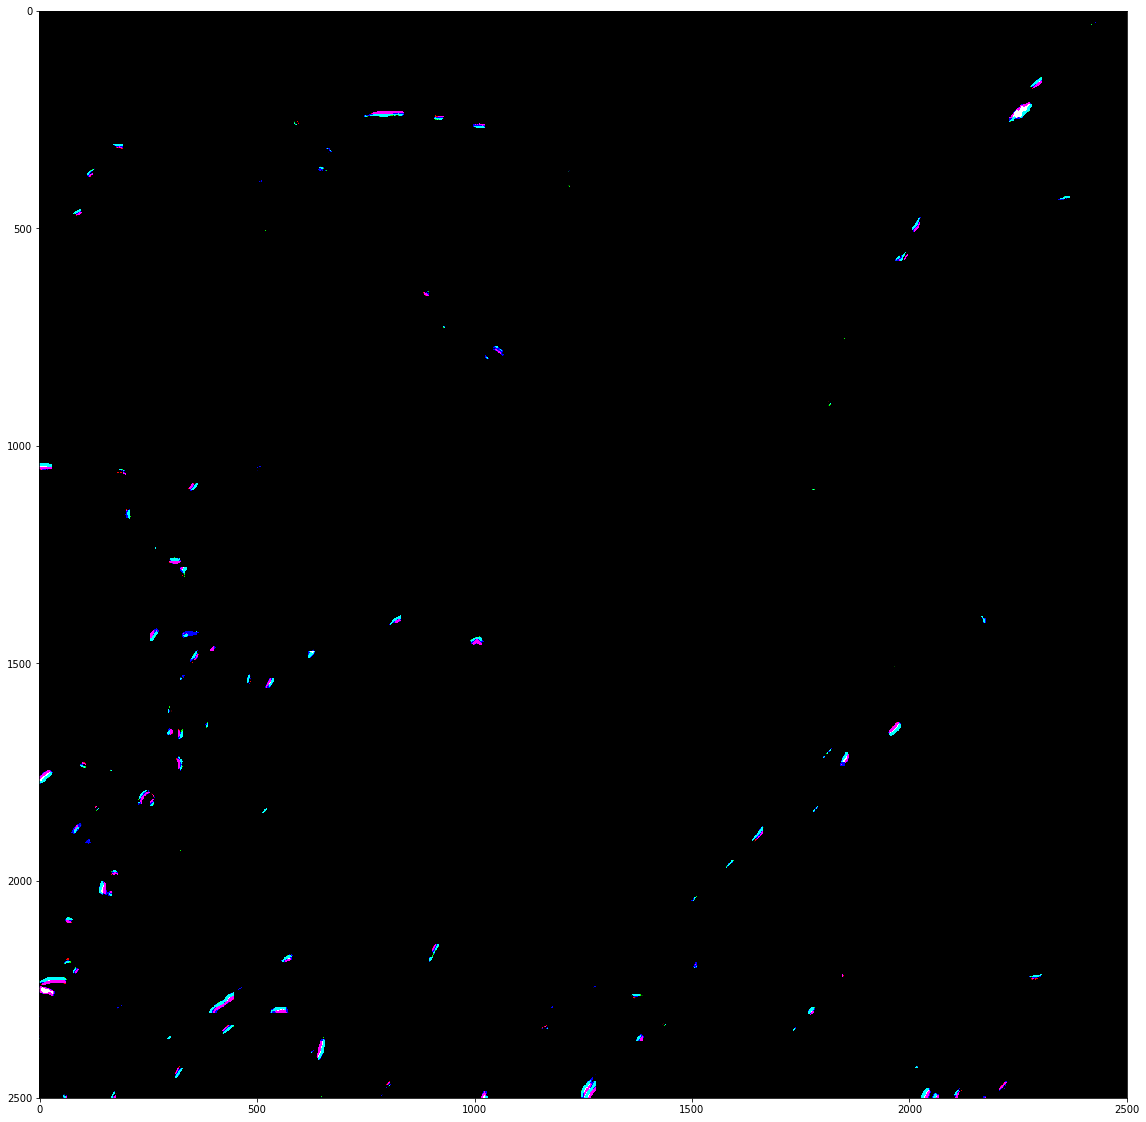

In [28]:
print("Thresholded Image Shape: ", temp.shape)
print("Thresholded Image")
plt.figure(figsize=(20,20))
plt.imshow(temp[:, 10].transpose(1,2,0))
plt.show()

[0 1 2]


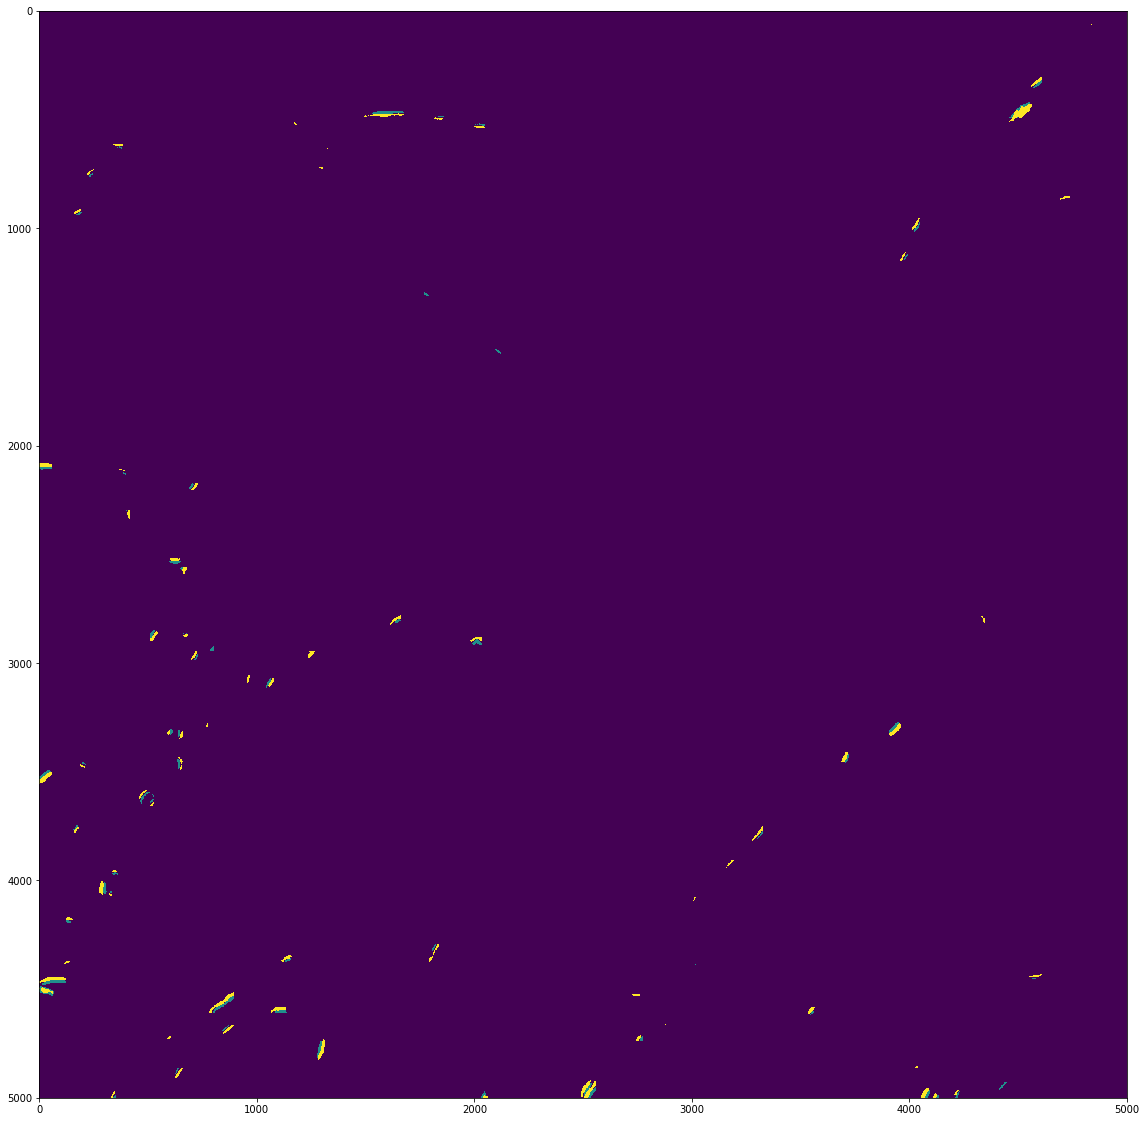

In [29]:
from skimage.morphology import remove_small_objects

seg = temp.copy()
seg1 = (temp[0]!=0) * (temp[2]!=0)
seg1 = remove_small_objects(seg1, min_size=128, connectivity=1)
seg2 = (temp[1]!=0) * (temp[2]!=0)
seg2 = remove_small_objects(seg2, min_size=128, connectivity=1)
seg = np.maximum(seg1.astype(np.uint8), seg2.astype(np.uint8)*2)
seg = zoom(seg, (1.0, 2.0, 2.0), order=0, prefilter=False)
print(np.unique(seg))

plt.figure(figsize=(20,20))
plt.imshow(seg[10]*127)
plt.show()

In [30]:
from skimage.measure import label
print(seg.shape)
temp_pos = (seg == 1).astype(int)
cc_label = label(temp_pos)
print("Number of synapses: ", len(np.unique(cc_label))-1)

(100, 5000, 5000)
Number of synapses:  454


In [33]:
seg_path = 'path/to/processed.h5'
fh = h5py.File(seg_path, 'w')
fh.create_dataset('main', data=seg, compression='gzip')
fh.close()

In [34]:
import imageio
import os
img_save_path = 'path/to/processed'
if not os.path.exists(img_save_path):
    os.makedirs(img_save_path)
for i in range(seg.shape[0]):
    imageio.imsave('%s/%03d.png' % (img_save_path, i), seg[i])